In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from PIL import Image

In [2]:
def remove_invalid_images(directory):
    for root, _, files in os.walk(directory):
        for name in files:
            file_path = os.path.join(root, name)
            try:
                img = Image.open(file_path)
                img.verify()
            except:
                os.remove(file_path)

remove_invalid_images("dataset/train")
remove_invalid_images("dataset/test")

d:\PROJECT\SIB DBS FOUNDATION\submission klasifikasi gambar\env_cnn\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [3]:
# Buat folder validation/ jika belum ada
base_dir = "dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

if not os.path.exists(val_dir):
    os.makedirs(val_dir + "/cat", exist_ok=True)
    os.makedirs(val_dir + "/dog", exist_ok=True)

    # Pindahkan 20% data ke validation
    for class_name in ["cat", "dog"]:
        src_folder = os.path.join(train_dir, class_name)
        val_folder = os.path.join(val_dir, class_name)
        files = os.listdir(src_folder)
        np.random.shuffle(files)
        val_size = int(len(files) * 0.2)

        for f in files[:val_size]:
            shutil.move(os.path.join(src_folder, f), os.path.join(val_folder, f))

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = val_datagen.flow_from_directory(
    "dataset/validation",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    "dataset/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    color_mode='grayscale'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 24998 images belonging to 2 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 37, 37, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,402,881 (5.35 MB)

 Trainable params: 1,402,689 (5.35 MB)

 Non-trainable params: 192 (768.00 B)

In [7]:
cat_count = len(os.listdir('dataset/train/cat'))
dog_count = len(os.listdir('dataset/train/dog'))

total = cat_count + dog_count
weight_cat = (1 / cat_count) * total / 2.0
weight_dog = (1 / dog_count) * total / 2.0

class_weights = {0: weight_cat, 1: weight_dog}

In [8]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    class_weight=class_weights
)

d:\PROJECT\SIB DBS FOUNDATION\submission klasifikasi gambar\env_cnn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 683s 1s/step - accuracy: 0.5388 - loss: 1.0259 - val_accuracy: 0.5750 - val_loss: 0.6702
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 706s 1s/step - accuracy: 0.6094 - loss: 0.6422 - val_accuracy: 0.6110 - val_loss: 0.6599
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 644s 1s/step - accuracy: 0.7170 - loss: 0.5601 - val_accuracy: 0.7757 - val_loss: 0.4971
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 578s 925ms/step - accuracy: 0.7819 - loss: 0.4619 - val_accuracy: 0.7523 - val_loss: 0.5331
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.8170 - loss: 0.3938 - val_accuracy: 0.8195 - val_loss: 0.3981
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 640s 1s/step - accuracy: 0.8543 - loss: 0.3190 - val_accuracy: 0.7771 - val_loss: 0.4749
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 691s 1s/step - accuracy: 0.8775 - loss: 0.2851 - val_accuracy: 0.8539 - val_loss: 0.3406
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 637s 1s/step - accuracy: 0.9037 - loss: 0.2284 - val_a

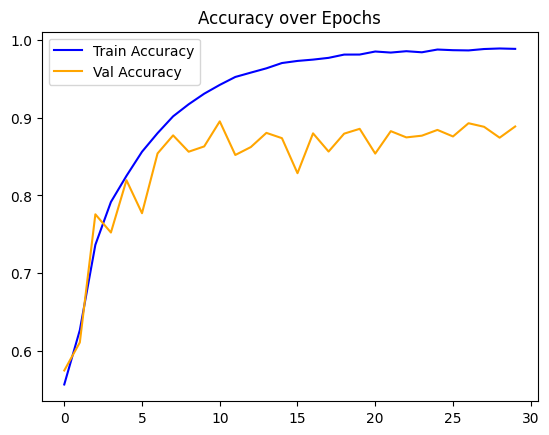

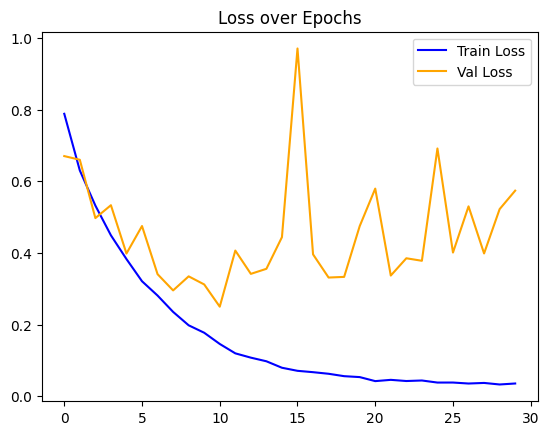

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

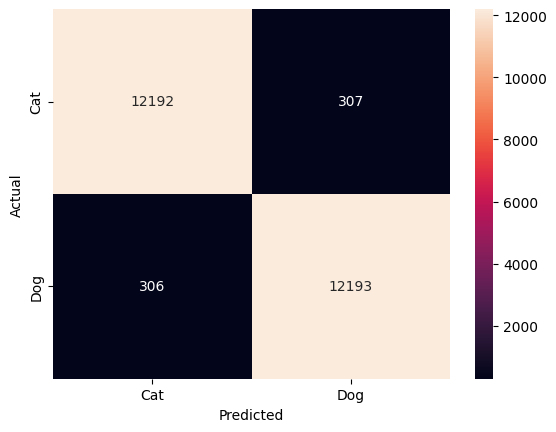

              precision    recall  f1-score   support

         Cat       0.98      0.98      0.98     12499
         Dog       0.98      0.98      0.98     12499

    accuracy                           0.98     24998
   macro avg       0.98      0.98      0.98     24998
weighted avg       0.98      0.98      0.98     24998



In [10]:
test_generator.reset()
preds = model.predict(test_generator, verbose=0)
preds_binary = (preds > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, preds_binary)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Cat','Dog'], yticklabels=['Cat','Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(test_generator.classes, preds_binary, target_names=['Cat','Dog']))

In [13]:
import tensorflow as tf
import os

# Buat folder tujuan jika belum ada
os.makedirs("submission/saved_model", exist_ok=True)

# Simpan model ke format SavedModel (standar TensorFlow)
model.export("submission/saved_model")

INFO:tensorflow:Assets written to: submission/saved_model\assets


INFO:tensorflow:Assets written to: submission/saved_model\assets


Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1445333889680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445333890448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445333889488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445333888528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445304216912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445333889104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445333891792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445333892944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445339022160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445339022544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1445333891216: TensorSpec(